In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA 
register_matplotlib_converters()
from time import time 
from sklearn.model_selection import train_test_split

In [2]:
tick="MSFT"
msft = yf.download(tick, start="2017-01-01", end="2023-01-01")

[*********************100%%**********************]  1 of 1 completed


In [3]:
type(msft)

pandas.core.frame.DataFrame

In [4]:
msft.reset_index(inplace=True)

In [5]:
msft

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,62.790001,62.840000,62.130001,62.580002,56.930580,20694100
1,2017-01-04,62.480000,62.750000,62.119999,62.299999,56.675858,21340000
2,2017-01-05,62.189999,62.660000,62.029999,62.299999,56.675858,24876000
3,2017-01-06,62.299999,63.150002,62.040001,62.840000,57.167107,19922900
4,2017-01-09,62.759998,63.080002,62.540001,62.639999,56.985149,20382700
...,...,...,...,...,...,...,...
1505,2022-12-23,236.110001,238.869995,233.940002,238.729996,235.769745,21207000
1506,2022-12-27,238.699997,238.929993,235.830002,236.960007,234.021713,16688600
1507,2022-12-28,236.889999,239.720001,234.169998,234.529999,231.621841,17457100
1508,2022-12-29,235.649994,241.919998,235.649994,241.009995,238.021500,19770700


In [6]:
msft.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
#checking for missing/NAN values
msft.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
msft.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1510,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,2020-01-01 23:38:03.973510144,173.581199,175.349007,171.702099,173.612358,167.582616,2.892333e+07
min,2017-01-03 00:00:00,62.189999,62.660000,61.950001,62.299999,56.675858,7.425600e+06
25%,2018-07-03 12:00:00,101.177502,101.964998,99.769999,101.145000,95.092173,2.086662e+07
50%,2020-01-02 12:00:00,152.215004,155.595001,151.084999,153.730003,148.003555,2.577220e+07
75%,2021-07-01 18:00:00,244.965000,247.794998,242.857494,245.157497,240.792355,3.320730e+07
max,2022-12-30 00:00:00,344.619995,349.670013,342.200012,343.109985,335.709778,1.112421e+08
std,NaN,81.908529,82.826673,80.919448,81.912107,81.816399,1.255386e+07


In [9]:
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1510 non-null   datetime64[ns]
 1   Open       1510 non-null   float64       
 2   High       1510 non-null   float64       
 3   Low        1510 non-null   float64       
 4   Close      1510 non-null   float64       
 5   Adj Close  1510 non-null   float64       
 6   Volume     1510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.7 KB


In [10]:
df = msft[['Date', 'Close']]
df.head()

,Date,Close
0,2017-01-03,62.580002
1,2017-01-04,62.299999
2,2017-01-05,62.299999
3,2017-01-06,62.840000
4,2017-01-09,62.639999


In [11]:
df.index = df.pop('Date')
df

,Close
Date,
2017-01-03,62.580002
2017-01-04,62.299999
2017-01-05,62.299999
2017-01-06,62.840000
2017-01-09,62.639999
...,...
2022-12-23,238.729996
2022-12-27,236.960007
2022-12-28,234.529999


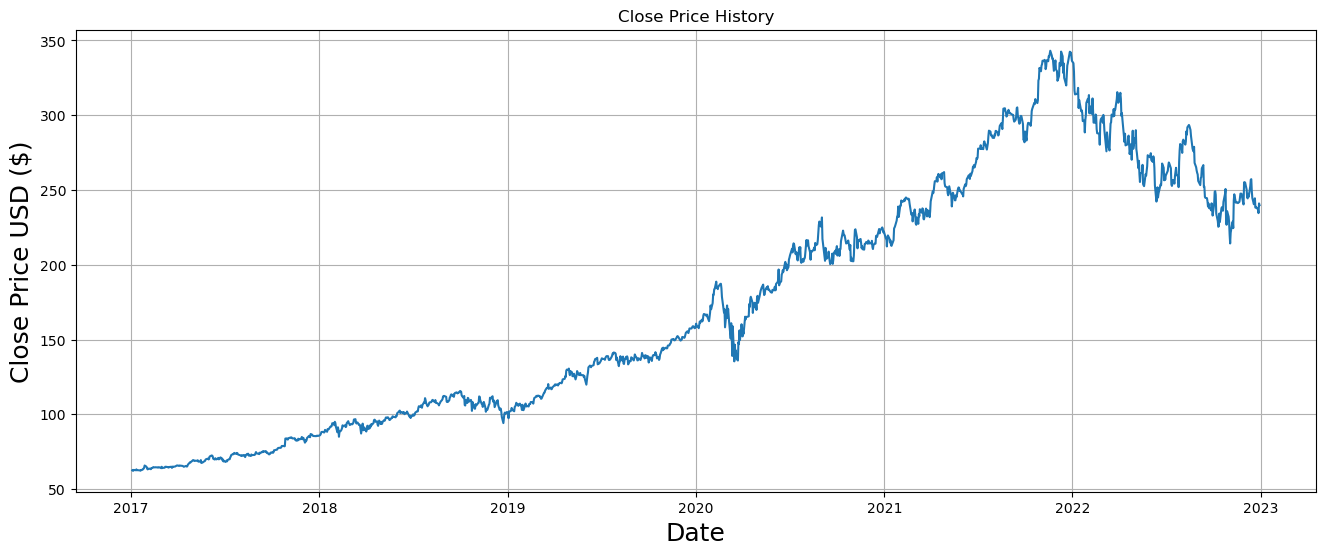

In [12]:
#visualizing historical stock data 
plt.figure(figsize=(16,6))
plt.plot(df.index, df['Close'])
plt.title('Close Price History')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.grid(True)
plt.show()

In [13]:
#Splitting data train-->60%, validation-->20%, test-->20%
temp_df, test_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=False)
train_df, val_df = train_test_split(temp_df, test_size=0.25, random_state=42, shuffle=False)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_train_values = scaler.fit_transform(train_df[['Close']])

scaled_train_df = pd.DataFrame(scaled_train_values, index=train_df.index, columns=['Close'])

In [15]:
scaled_val_values = scaler.transform(val_df[['Close']])
scaled_test_values = scaler.transform(test_df[['Close']])

scaled_val_df = pd.DataFrame(scaled_val_values, index=val_df.index, columns=['Close'])
scaled_test_df = pd.DataFrame(scaled_test_values, index=test_df.index, columns=['Close'])

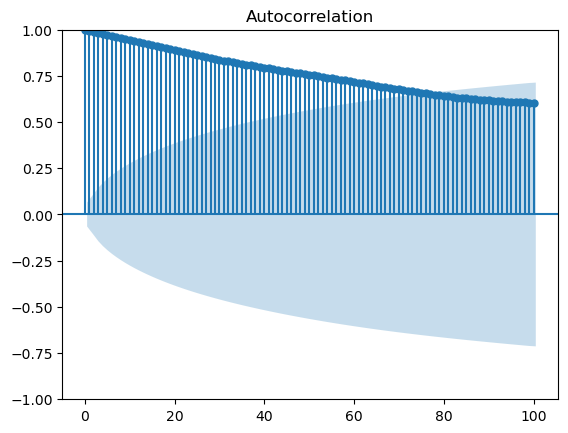

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plot ACF
acf_plot = plot_acf(scaled_train_df, lags=100)

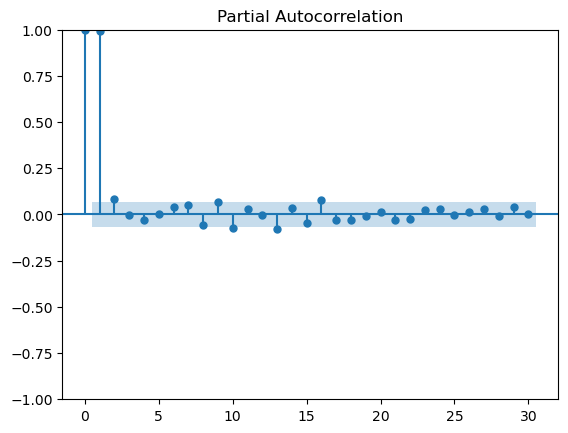

In [17]:
#plot PACF
pacf_plot = plot_pacf(scaled_train_df)

In [18]:
#create the model ARIMA Auto regressive integrated moving averages
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(scaled_train_df, order=(1,2,1)) 

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [19]:
#fit the model
from time import time 
start=time()
model_fit = model.fit()
end=time()
print("model fitting time: ", end-start)

model fitting time:  0.6880369186401367


In [20]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  906
Model:                 ARIMA(1, 2, 1)   Log Likelihood                2497.415
Date:                Tue, 25 Jun 2024   AIC                          -4988.829
Time:                        17:40:53   BIC                          -4974.409
Sample:                             0   HQIC                         -4983.322
                                - 906                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3525      0.012    -29.157      0.000      -0.376      -0.329
ma.L1         -0.9975      0.005   -217.379      0.000      -1.007      -0.989
sigma2         0.0002   4.36e-06     53.168      0.0

In [21]:
pred_start_date = scaled_val_df.index[0]    # First date in the index
pred_end_date = scaled_val_df.index[-1]     # Last date in the index

start_idx = scaled_val_df.index.get_loc(pred_start_date)
end_idx = scaled_val_df.index.get_loc(pred_end_date)

print(pred_start_date)
print(pred_end_date)

print(start_idx)
print(end_idx)

2020-08-10 00:00:00
2021-10-19 00:00:00
0
301


In [22]:
#get predictions and residuals
predictions = model_fit.predict(start=start_idx, end=end_idx)
residuals = val_df-predictions

predictions

Date
2017-01-03    0.000000
2017-01-04    0.002723
2017-01-05   -0.001815
2017-01-06   -0.001228
2017-01-09    0.002947
                ...   
2018-03-09    0.207978
2018-03-12    0.218194
2018-03-13    0.224003
2018-03-14    0.214559
2018-03-15    0.206775
Name: predicted_mean, Length: 302, dtype: float64

In [23]:
predictions.index = scaled_val_df.index
predictions.index

DatetimeIndex(['2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-17', '2020-08-18', '2020-08-19',
               '2020-08-20', '2020-08-21',
               ...
               '2021-10-06', '2021-10-07', '2021-10-08', '2021-10-11',
               '2021-10-12', '2021-10-13', '2021-10-14', '2021-10-15',
               '2021-10-18', '2021-10-19'],
              dtype='datetime64[ns]', name='Date', length=302, freq=None)

Text(0, 0.5, 'Closing price')

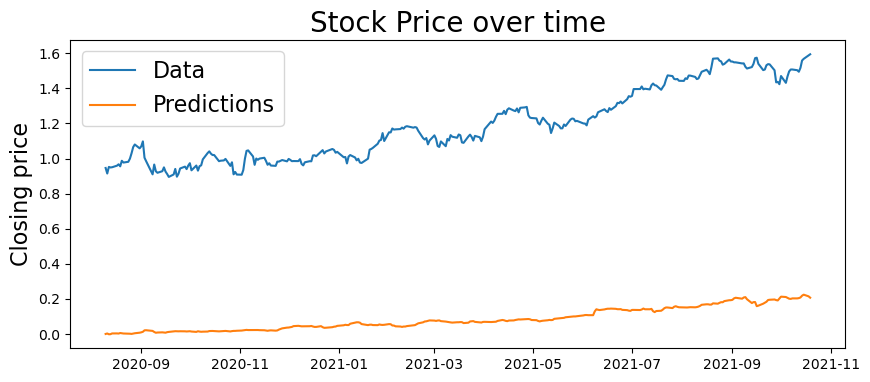

In [24]:
plt.figure(figsize=(10,4))
plt.plot(scaled_val_df)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Stock Price over time', fontsize=20)
plt.ylabel('Closing price', fontsize=16)

In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

P, D, Q, m = 1, 1, 1, 12  # Example for monthly seasonality
sarima_model = SARIMAX(scaled_train_df['Close'], order=(1, 2, 1), seasonal_order=(P, D, Q, m))
sarima_fitted = sarima_model.fit()

# Display model summaries
print(sarima_fitted.summary())

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  906
Model:             SARIMAX(1, 2, 1)x(1, 1, 1, 12)   Log Likelihood                2439.533
Date:                            Tue, 25 Jun 2024   AIC                          -4869.066
Time:                                    17:40:59   BIC                          -4845.098
Sample:                                         0   HQIC                         -4859.906
                                            - 906                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3504      0.013    -27.298      0.000      -0.376      -0.325
ma.L1         -0.9968      0.009   

In [27]:
predictions_srima = sarima_fitted.forecast(len(scaled_val_df))
print(predictions_srima.values)

predictions_srima_df = pd.DataFrame(predictions_srima.values, index=val_df.index, columns=['Close'])

[0.98218305 0.9804373  0.9897105  0.98797687 0.99130106 0.99434237
 0.99359642 0.99739029 0.99943573 1.00259246 1.00550181 1.00733273
 1.00863993 1.01071556 1.01847507 1.01762564 1.02041116 1.02370333
 1.0226339  1.02349556 1.02653205 1.02994351 1.03207726 1.03506067
 1.03609411 1.03835661 1.04608    1.04529466 1.04808481 1.05141462
 1.05035881 1.05112505 1.05423011 1.05767936 1.05980784 1.06286656
 1.0639157  1.06621316 1.07396218 1.07320667 1.07602415 1.07938267
 1.07835458 1.07914397 1.08227905 1.08575702 1.08791242 1.09100143
 1.09207837 1.09440443 1.10218167 1.10145455 1.10430032 1.10768718
 1.10668739 1.1075049  1.11066837 1.11417468 1.11635836 1.11947578
 1.12058103 1.12293543 1.13074098 1.1300422  1.13291629 1.13633149
 1.13536002 1.13620585 1.13939765 1.14293229 1.14514429 1.14829004
 1.14942361 1.15180634 1.15964023 1.15896977 1.16187219 1.16531571
 1.16437257 1.16524673 1.16846686 1.17202983 1.17427016 1.17744423
 1.17860614 1.18101719 1.1888794  1.18823727 1.19116802 1.1946

C:\Users\asus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
predictions_srima_df

,Close
Date,
2020-08-10,0.982183
2020-08-11,0.980437
2020-08-12,0.989711
2020-08-13,0.987977
2020-08-14,0.991301
...,...
2021-10-13,1.753914
2021-10-14,1.756664
2021-10-15,1.760348


Text(0, 0.5, 'Closing price')

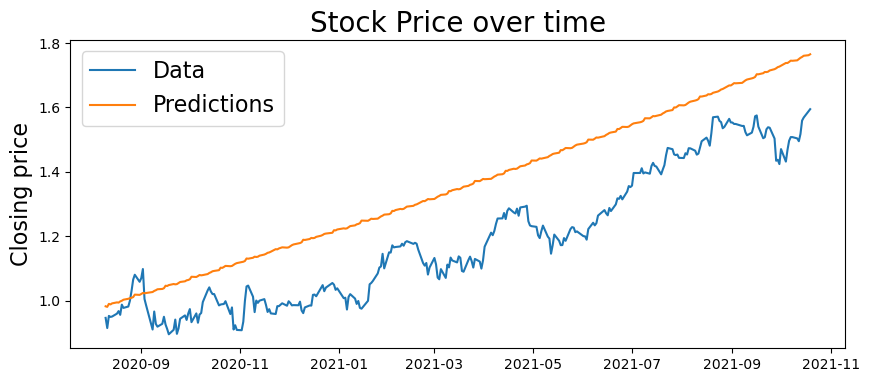

In [30]:
plt.figure(figsize=(10,4))
plt.plot(scaled_val_df)
plt.plot(predictions_srima_df)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Stock Price over time', fontsize=20)
plt.ylabel('Closing price', fontsize=16)